In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

Min Max Scaler

In [2]:
df = pd.read_csv('../Data/housing.csv')

In [3]:
df.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

<Axes: >

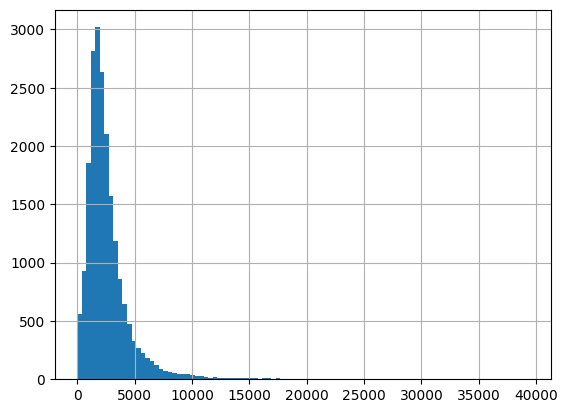

In [4]:
df.total_rooms.hist(bins=100)

In [19]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df[['total_rooms']])

In [22]:
df.total_rooms.std()

2181.615251582795

In [24]:
(df.total_rooms.max() - df.total_rooms.min()) * scaled.std()

2181.5624017359723

<Axes: >

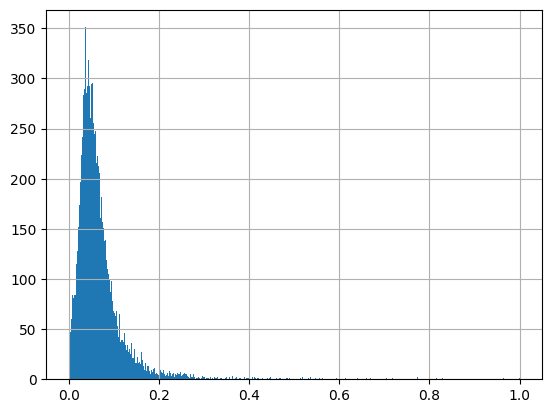

In [18]:
scaled_df = pd.DataFrame(scaled, columns=['total_rooms_scaled'])
scaled_df.total_rooms_scaled.hist(bins=1000)

Test Effekt auf lineare Regression

In [7]:
df_prep = df.dropna(how='any')

In [8]:
predictor_cols = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income"
]
target_col = "median_house_value"

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(df_prep[predictor_cols], df_prep[target_col])
predictions = lin_reg.predict(df_prep[predictor_cols])

In [12]:

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_prep[target_col], predictions))

69556.14839566675

Now, scale

In [13]:
df_scale = scaler.fit_transform(df_prep[predictor_cols])

In [14]:
df_scale = pd.DataFrame(
    df_scale,
    columns=predictor_cols
)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(df_scale[predictor_cols], df_prep[target_col])
predictions = lin_reg.predict(df_scale[predictor_cols])
np.sqrt(mean_squared_error(df_prep[target_col], predictions))

69556.14839566677

Standard Scaler

In [25]:
df.housing_median_age.std(), df.housing_median_age.mean()

(12.58555761211165, 28.639486434108527)

<Axes: >

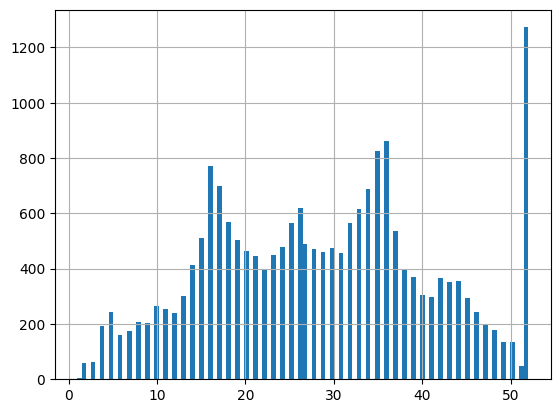

In [26]:
df.housing_median_age.hist(bins=100)

In [27]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(df[['housing_median_age']])

<Axes: >

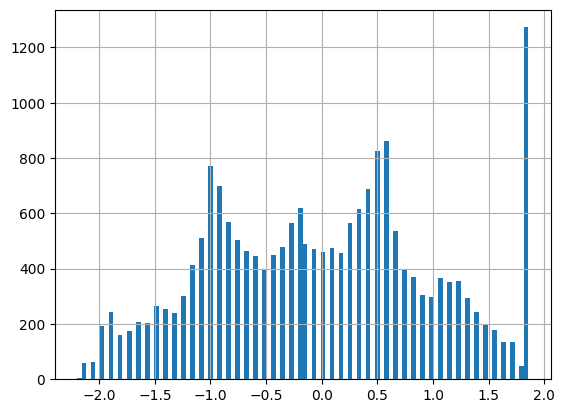

In [28]:
scaled_df = pd.DataFrame(scaled, columns=['housing_median_age'])
scaled_df.housing_median_age.hist(bins=100)

In [29]:
scaled_df.housing_median_age.std(), scaled_df.housing_median_age.mean()

(1.0000242256864988, 5.508083222946513e-18)

In [30]:
(df.housing_median_age.max() - df.housing_median_age.min()) * scaled_df.housing_median_age.std()

51.00123551001144

Heavytailed distributions

In [26]:
import json
import pandas as pd
data_file = open('../Data/yelp/yelp_academic_dataset_business.json')
data = []
for line in data_file:
    data.append(json.loads(line))
review_df = pd.DataFrame(data)
data_file.close()

<Axes: >

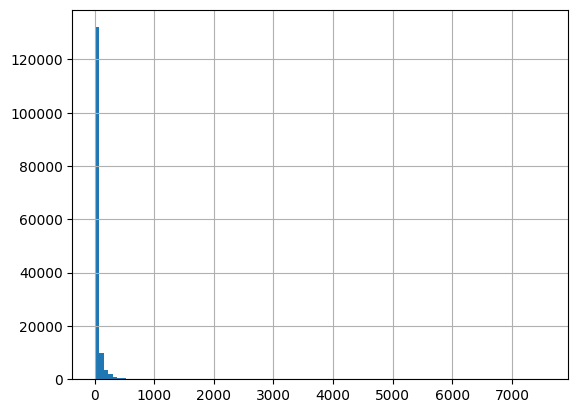

In [27]:
review_df['review_count'].hist(bins=100)

In [30]:
review_df['log_review_count'] = np.log10(review_df.review_count)

<Axes: >

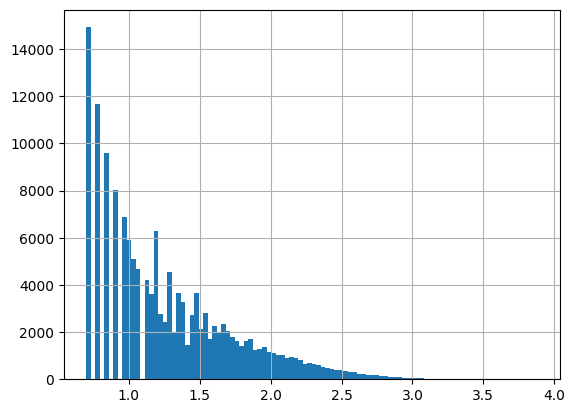

In [31]:
review_df['log_review_count'].hist(bins=100)

In [36]:
news_df = pd.read_csv('../Data/OnlineNewsPopularity/OnlineNewsPopularity.csv')

<Axes: >

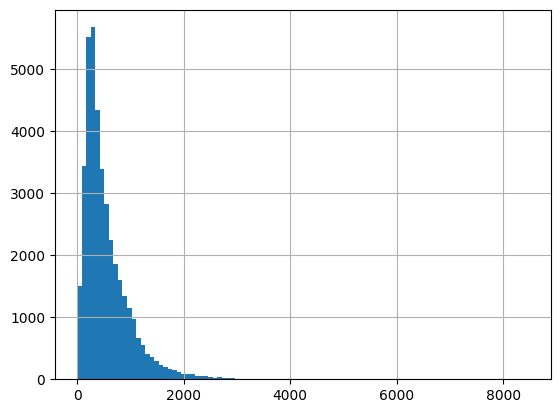

In [38]:
news_df[' n_tokens_content'].hist(bins=100)

In [42]:
news_df['log_n_tokens_content'] = np.log10(news_df[' n_tokens_content'] + 1)

<Axes: >

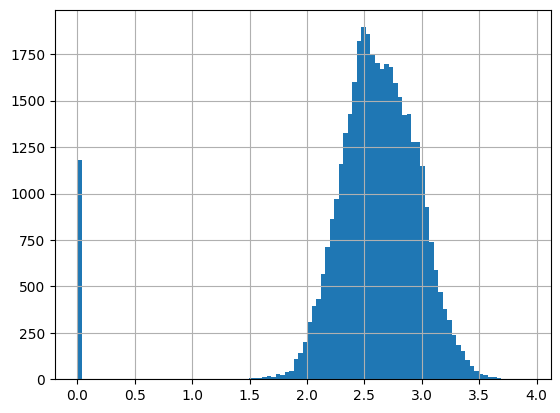

In [43]:
news_df['log_n_tokens_content'].hist(bins=100)

Using linear regression after log transform

In [44]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(
    m_orig,
    review_df[['review_count']],
    review_df['stars'],
    cv=10
)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(
    m_log,
    review_df[['log_review_count']],
    review_df['stars'],
    cv=10
)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00354 (+/- 0.00148)
R-squared score with log transform: 0.00241 (+/- 0.00125)


In [46]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(
    m_orig,
    news_df[[' c']],
    news_df[' shares'],
    cv=10
)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(
    m_log,
    news_df[['log_n_tokens_content']],
    news_df[' shares'],
    cv=10
)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


<Axes: xlabel='log_review_count', ylabel='stars'>

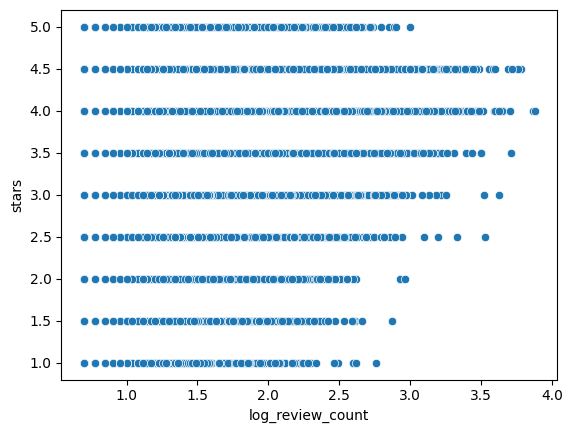

In [51]:
import seaborn as sns
sns.scatterplot(
    x=review_df['log_review_count'],
    y=review_df['stars']
)

<Axes: xlabel='review_count', ylabel='stars'>

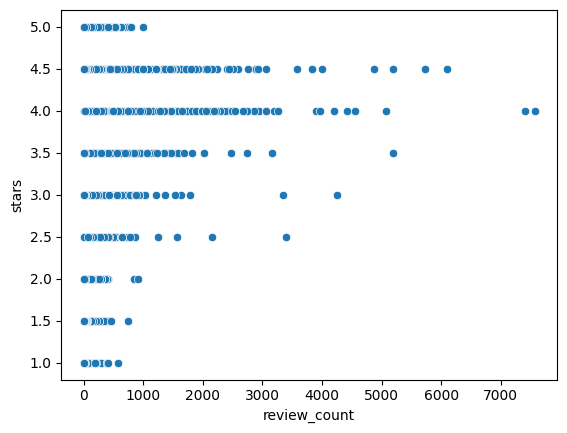

In [52]:
import seaborn as sns
sns.scatterplot(
    x=review_df['review_count'],
    y=review_df['stars']
)

<Axes: xlabel='log_n_tokens_content', ylabel=' shares'>

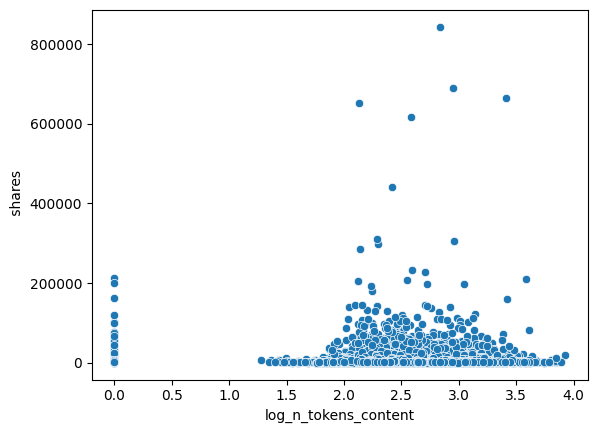

In [53]:
import seaborn as sns
import seaborn as sns
sns.scatterplot(
    x=news_df['log_n_tokens_content'],
    y=news_df[' shares']
)

<Axes: xlabel=' n_tokens_content', ylabel=' shares'>

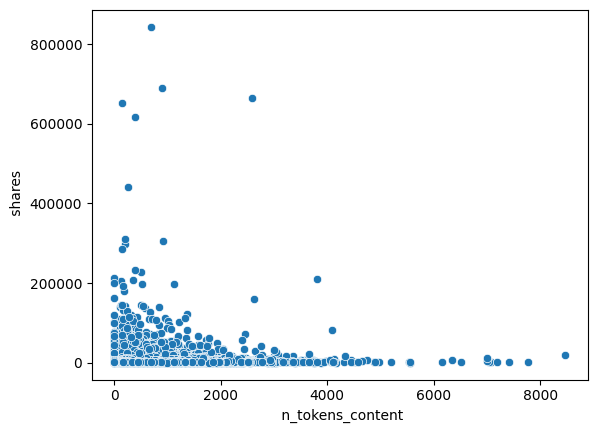

In [54]:
import seaborn as sns
import seaborn as sns
sns.scatterplot(
    x=news_df[' n_tokens_content'],
    y=news_df[' shares']
)